In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("used_cars_dekho_final.csv")

In [3]:
df.drop(['Unnamed: 0','location','wheel_size'], axis=1,inplace=True)

In [4]:
df.head()

,manufacturer,car_name,manufacturing_year,no_of_owners,kms_driven,city,transmission,mileage,fuel_type,mode_of_sale,seats,engine,max_power,price
0,Kia,Seltos,2019,First,"20,999",bangalore,Manual,16.10,Petrol,Dealer,5.0,1353.0,138.00,18.4
1,BMW,3,2011,Second,"90,000",bangalore,Automatic,16.07,Diesel,Dealer,5.0,1995.0,181.00,11.9
2,Audi,A8,2016,First,"25,000",bangalore,Automatic,16.77,Diesel,Dealer,4.0,2967.0,246.74,59.5
3,Mahindra,XUV500,2013,First,"31,000",bangalore,Manual,15.10,Diesel,Dealer,7.0,2179.0,140.00,9.75
4,Mahindra,Scorpio,2003,Third,"1,00,000",bangalore,Manual,10.50,Diesel,Individual,8.0,2179.0,120.00,2.1


In [5]:
df.isnull().sum()

manufacturer          0
car_name              0
manufacturing_year    0
no_of_owners          0
kms_driven            0
city                  0
transmission          0
mileage               7
fuel_type             0
mode_of_sale          0
seats                 7
engine                7
max_power             9
price                 0
dtype: int64

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype(float)
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.replace(',','')).astype(float)
df['seats'] = df['seats'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        378 non-null    object 
 1   car_name            378 non-null    object 
 2   manufacturing_year  378 non-null    int64  
 3   no_of_owners        378 non-null    object 
 4   kms_driven          378 non-null    float64
 5   city                378 non-null    object 
 6   transmission        378 non-null    object 
 7   mileage             378 non-null    float64
 8   fuel_type           378 non-null    object 
 9   mode_of_sale        378 non-null    object 
 10  seats               378 non-null    int64  
 11  engine              378 non-null    float64
 12  max_power           378 non-null    float64
 13  price               378 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 41.5+ KB


In [19]:
tof = []
for x in df['seats']:
    if x < 5:
        tof.append("hatchback")
    elif x == 5:
        tof.append("sedan")
    elif x > 5 and x <= 7:
        tof.append("suv")
    elif x > 7:
        tof.append("mini van")
    else:
        tof.append(None)
        
df['type_of_car'] = tof

## Univariate Analysis

### Price

In [10]:
df['price'].describe()

count      378.000000
mean      1506.643942
std      11024.097794
min          1.000000
25%          4.112500
50%          6.300000
75%         14.437500
max      95000.000000
Name: price, dtype: float64

From the summary above, we see that prices are in lakth and go up to over ₹95000 Lakhs! This is obviously wrong. While looking at all cars below ₹1,00,000 in more detail, I noticed that many of these prices are confused with thousands: I found prices such as ‘75000’, ‘80000', '95000', etc which definitely say prices in thousands. To try and filter out most of these issues, I filtered all the observations < than ₹1 Lakh and divided it with 1,00,000 to denote all the prices in lakhs. Altenatively, we could multiply all the observations > ₹1 Lakh with 1,00,000 to denote prices in thousands and lakhs but have one denotion of price and short lenght on values was more easy to work on.

In [14]:
df.price[df['price'] > 1000] = df['price']/100000

In [15]:
df.price.max()

89.0

In [28]:
px.histogram(df, x='price', title="Count of Price")

### Type of car

In [20]:
px.histogram(df, x='type_of_car', title="Count of Type of Cars")

This categorical variable has 4 levels and indicates the body style of the car (hatchback, sedan, SUV and mini van). This tends to reflect the general market, with a prominence of “family” vehicles and smaller volumes of SUV's.

### Transmission

In [23]:
px.histogram(df, x="transmission", title="Count of Transmission of vehicles")

This categorical variable has 2 levels indication type of transmission of the vehicle, Manual transmission being twice as prominant as Automatic Transmission on Indian roads

### Fuel Type

In [22]:
px.histogram(df, x='fuel_type', title="Count of Fuel Types")

This categorical variable has 4 levels and indicates the fuel type of the car. Diesel is roughly twice as prominent as Petrol.

### Engine Power

In [39]:
px.box(df, x="engine", title="Engine")

The engine power is measured using the metric cubic capacity (usually abbreviated as CC). The average engine power of the used cars lies around 1000CC and 2000CC offering median engine power of around 1500CC vehicles

### Manufacturer

In [32]:
px.histogram(df, x="manufacturer", title="Manufacturer")

The top 5 manufacturers with vast availability of used cars for sale are Maruti, Hyundai, Honda, BMW and Toyota. We can use this summary to check correlation of brand availability and price of the used vehicle from the same manufacturer.

### Car Names

In [31]:
px.histogram(df, x="car_name", title="Car Name")

Without surprise, the swift, i20 and i10 Grand (the most popular budget car in India) is also top in the dataset.

### Manufacturing Year

In [42]:
px.histogram(df, x="manufacturing_year", title="Manufacturing Year")

This will basically tell us about the age of the vehicle. From the histogram, we saw that the minimum year is 1997 anf the maximum year is 2020. With this we can assume cars with recent manufacturing year has positive correltion with our target variable price.

### Mileage

In [34]:
px.box(df, x="mileage", title="Mileage")

Mileage is one of the most important pieces of information when it comes to used cars, so maximum mileage would have been desirable whien buying a used car.

### Kilometers Driven

In [38]:
px.box(df, x="kms_driven", title="Kilometers Driven")

Average used vehicles has been driven around 24000 kms to 80000 kms. We can assume kilometers driven to effect our target variable price correlating negtively

## Bivariate Analysis

In this section, I will examine pairs of variables to look for associations between variables, and then zoom in on some multi-variable combinations that seem particularly interesting.

First, let’s visualize potential variable associations using pairplot and check how each feature is correlated with eachother using a correlational matrix and heatmap

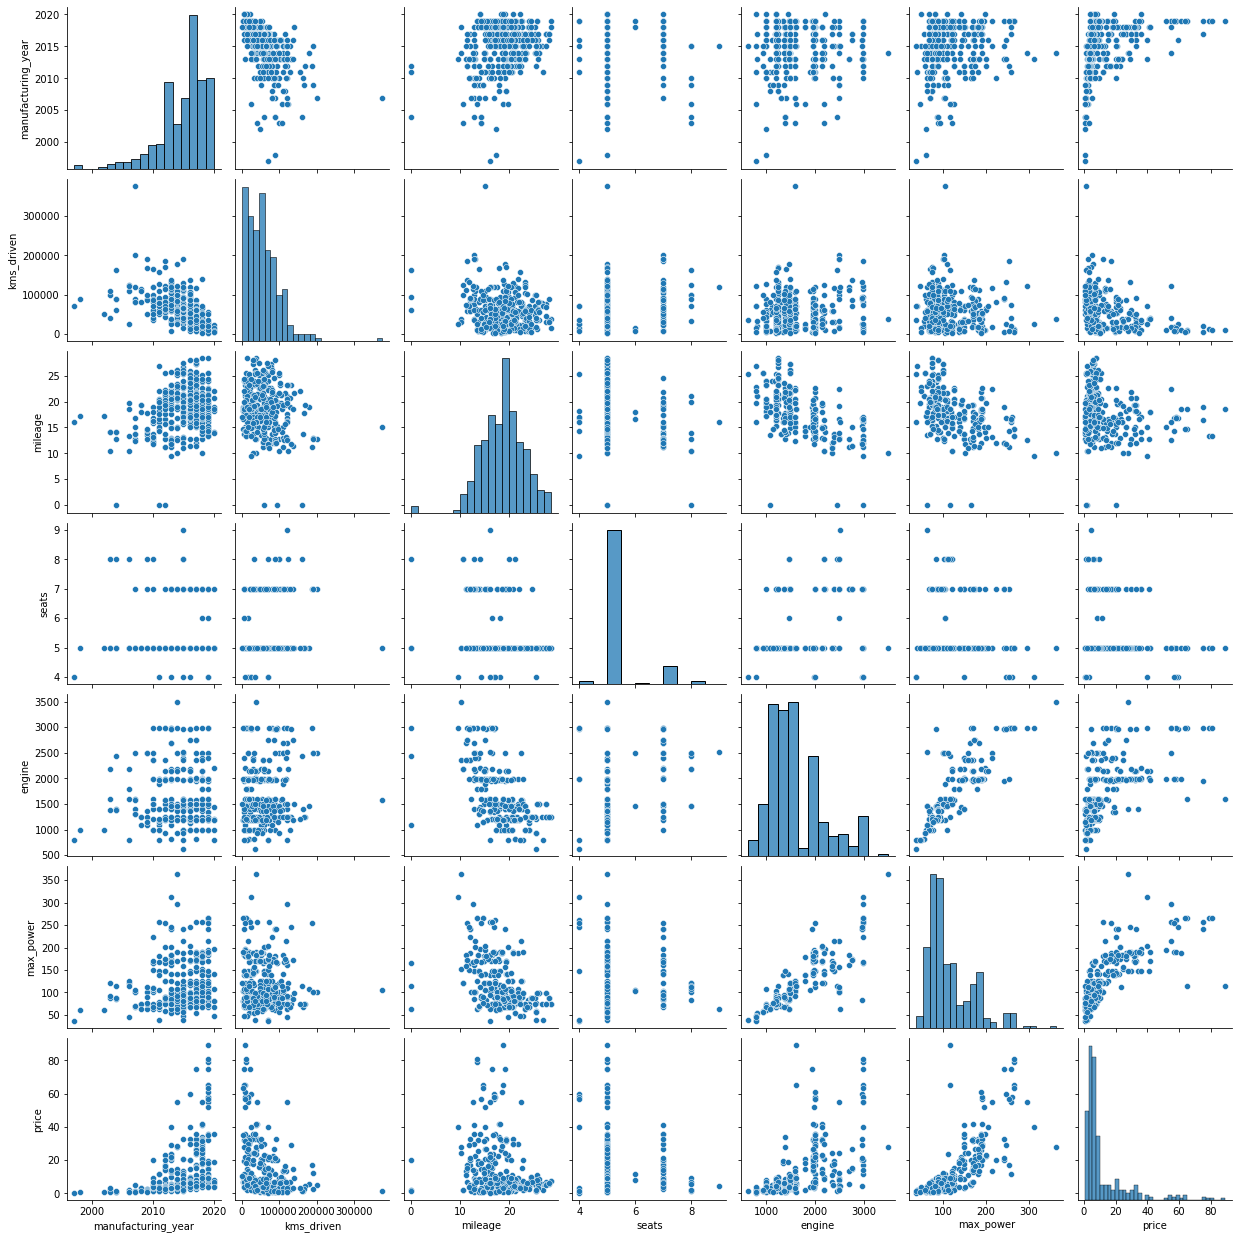

In [44]:
sns.pairplot(df)

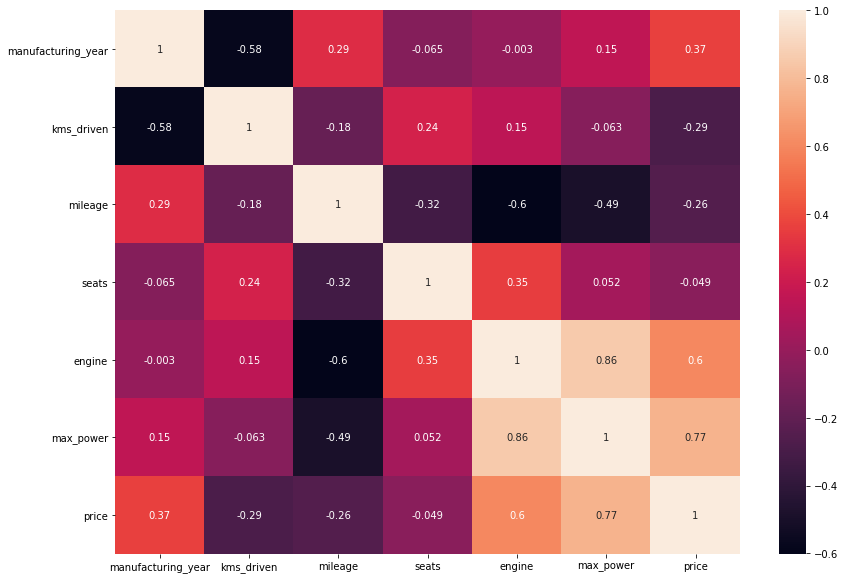

In [46]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)
plt.show()

Although pairplot is cluttered and confusing, ee can notice fairly strong correlations between price and max power, engine. Other correlations are weak. We will build individual plots for the most promising variable pairs. Eventually we would like to be able to predict prices based on the other variables, so let’s focus on price as one of our variables.

Text(0, 0.5, 'Price')

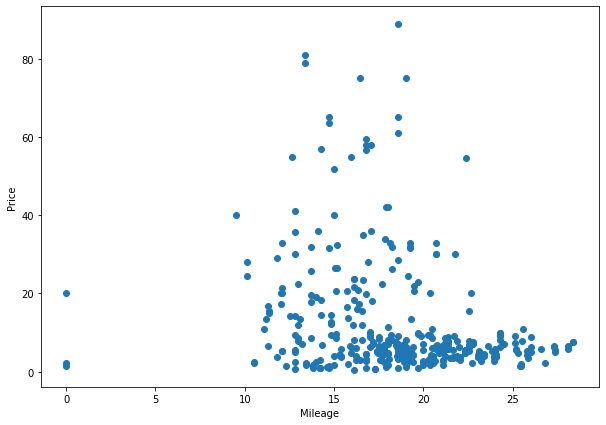

In [68]:
plt.figure(figsize=(10,7))
plt.scatter(data=df, x="mileage", y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')

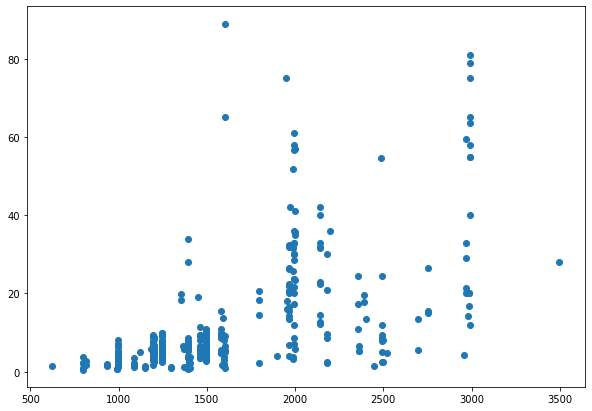

In [69]:
plt.figure(figsize=(10,7))
plt.scatter(data=df, x="engine", y='price')

In [99]:
px.box(df, x="fuel_type", y='engine')

In [89]:
px.box(df, x="fuel_type" ,y='manufacturing_year')

In [91]:
px.box(df, y="fuel_type" ,x='price')

In [102]:
px.box(df, y="engine", x="no_of_owners")

In [51]:
px.histogram(df, x="type_of_car",y="price")

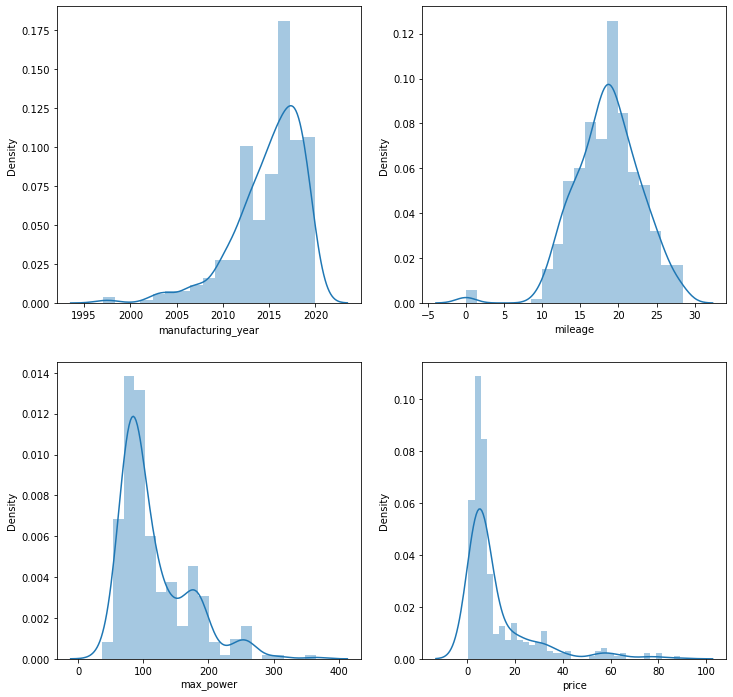

In [75]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(df['manufacturing_year'],ax=ax[0,0])
sns.distplot(df['mileage'],ax=ax[0,1])
sns.distplot(df['max_power'],ax=ax[1,0])
sns.distplot(df['price'],ax=ax[1,1])
plt.show()

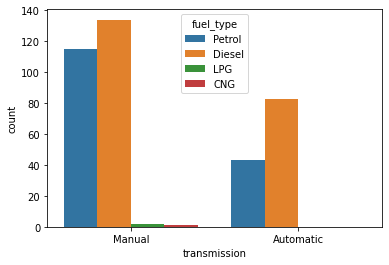

In [28]:
sns.countplot(df['transmission'],hue=df['fuel_type'])
plt.show()

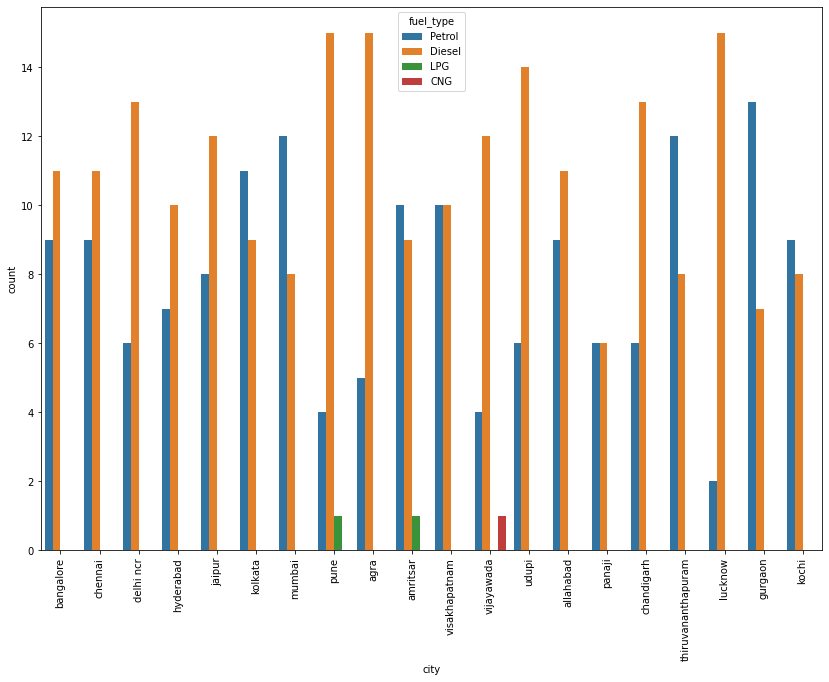

In [29]:
plt.figure(figsize=(14, 10))
sns.countplot(df['city'],hue=df['fuel_type'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1008x720 with 0 Axes>

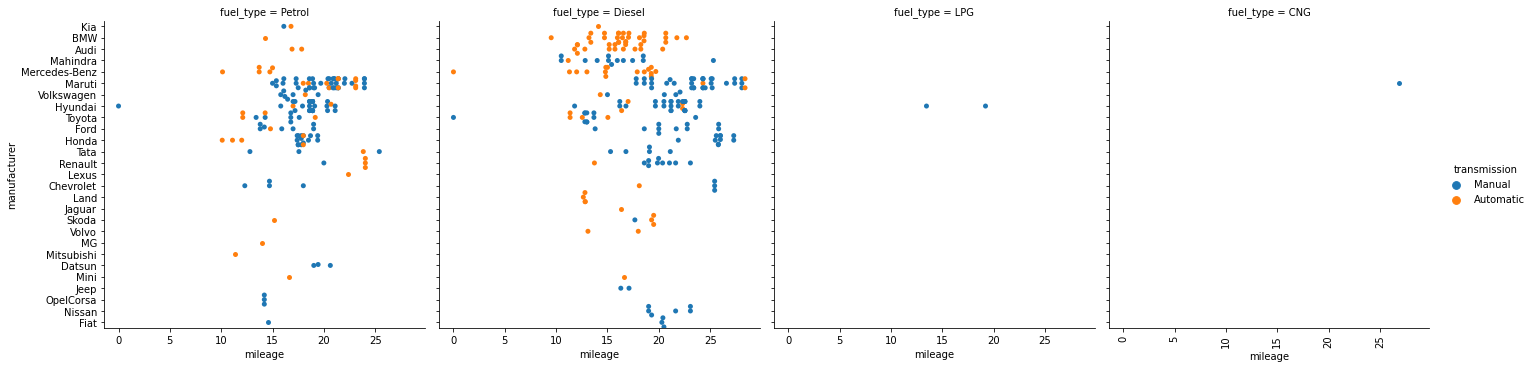

In [17]:
plt.figure(figsize=(14, 10))
sns.catplot(x='mileage',y='manufacturer', kind='swarm',col='fuel_type',hue='transmission',data=df)
plt.xticks(rotation=90)
plt.show()

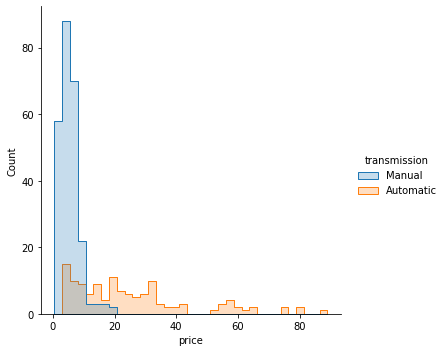

In [57]:
sns.displot(df, x="price", hue="transmission", element="step")

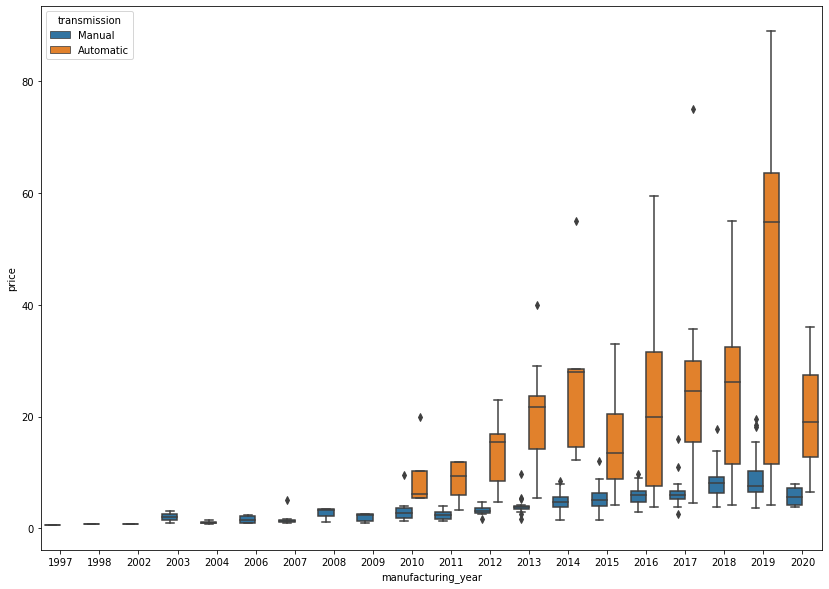

In [42]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='manufacturing_year',y='price',hue='transmission',data=df)
plt.show()

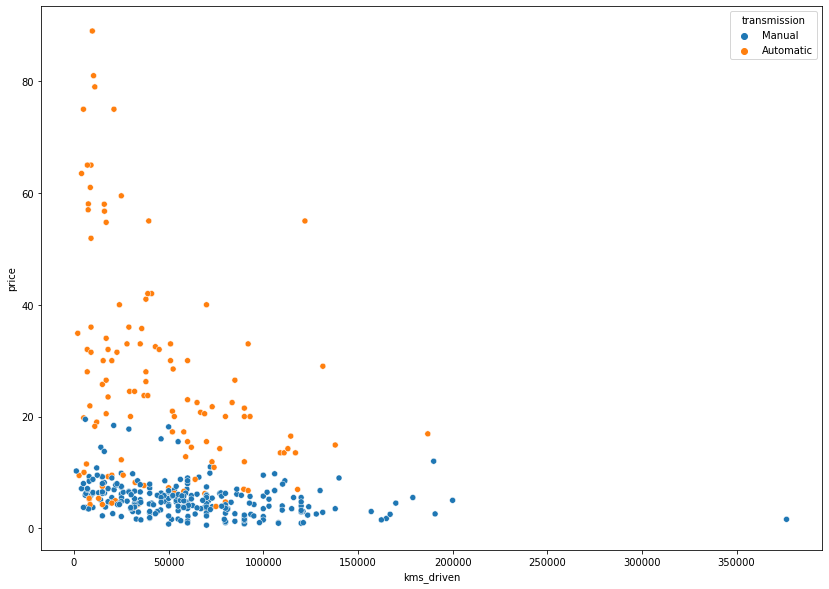

In [27]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='kms_driven',y='price',hue='transmission',data=df)
plt.show()

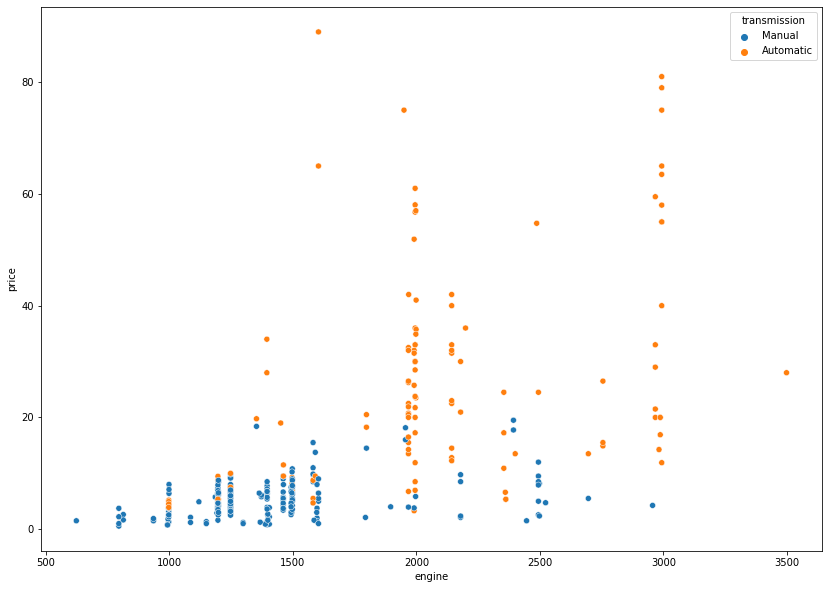

In [47]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='engine',y='price',hue='transmission',data=df)
plt.show()

In [65]:
px.box(df, y="price" ,x='manufacturing_year')

In [18]:
px.box(df, y="city" ,x='manufacturing_year')

In [19]:
px.box(df, y="city" ,x='transmission')

In [20]:
px.box(df, y="city" ,x='no_of_owners')

In [22]:
px.box(df, x="price" ,y='fuel_type')